# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy.

It contains 23 different subway card types
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


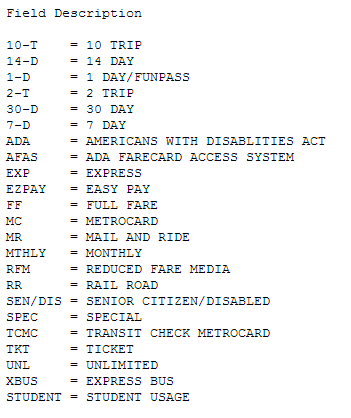

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

# Task 1:
## Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
## Identify it and figure out what it is due to.


# Task 2:
## Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


# Task 3:
## Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


# EXTRA CREDIT: Cluster.
## Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
## Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

## i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

## removing empty light curves
tots = tots[tots.std(1)>0]

## with Kmeans you have to choose the number of clusters ahead km =

KMeans(n_clusters=10)

## and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

## then you can run:

km.fit(vals)

# HINTS:

## When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


# Possibly useful functions

## I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used.
## (But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:

     np.fft.rfft(mydata) will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [2]:
import pylab as pl
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
#after reading the datacube you should see:
mta = np.load("MTA_Fare.npy")
mta = mta.astype(float)
mta.shape

(600, 23, 194)

In [4]:
# clean up the data
mta[mta==-1] = np.nan

In [5]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [6]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [7]:
date = pd.to_datetime(pd.date_range(start='06/1/2010', end='02/22/2014', freq='W').date)

In [8]:
fig = figure(figsize=(16,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlabel('Weeks since 05/21/2010', size=20)
ax.set_ylabel('Swipes(log10)', size=20)
ax.tick_params(axis='x',labelsize=10)
pl.xticks(rotation=40, fontsize=20)
for i in range(mta.shape[0]):
    for j in range(mta.shape[1]):
        ax.plot(date, np.log10(mta[i,j]))

In [9]:
#as described in the instruction for some of the analysis
#one can sum time series for all stations
print (mta.shape)
mta_allsum = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)

(600, 23, 194)
(23, 194)
(600, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

### notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


### below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

## Task 1:
* Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to.


In [10]:
# Sum up fare for all ride types
mta_allsum =np.nansum(mta, axis=0)
mta_allsum.shape

(23, 194)

In [11]:
# test the approach of threshold
thresholds = [mta_allsum[0,:].mean() + 3*mta_allsum[0,:].std(), 
              mta_allsum[0,:].mean() - 3*mta_allsum[0,:].std()]
print thresholds

[16879900.880204219, 9604845.0579401106]


In [12]:
ax = pd.DataFrame(mta_allsum[0,:]).plot()
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]])

In [14]:
# Plot the week against total ride for all staion.
fig = plt.figure(figsize=(18,18))
for i in range(23):
    ax = fig.add_subplot(6,4,i+1)
    ax.plot(pd.DataFrame(mta_allsum[i,:]))
    thresholds = [mta_allsum[i,:].mean() + 3*mta_allsum[i,:].std(),
                  mta_allsum[i,:].mean() - 3*mta_allsum[i,:].std()]
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]])
    ax.set_title(ridetype[i])

In [15]:
# Event detection
mta_allsum = pd.DataFrame(mta_allsum)
events = pd.Series()
for i in range(23):
    thresholds = [mta_allsum.loc[i,:].mean() + 3*mta_allsum.loc[i,:].std(), 
                  mta_allsum.loc[i,:].mean() - 3*mta_allsum.loc[i,:].std()]
    # event = pd.concat([event, pd.Series(date[mta_allsum.index[mta_allsum.loc[i,:]<thresholds[1]]])], axis=0, ignore_index=True)
    event = (mta_allsum.loc[i,:]<thresholds[1])
    events = pd.concat([events, pd.Series(date[event.index[event==True]])], axis=0, ignore_index=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

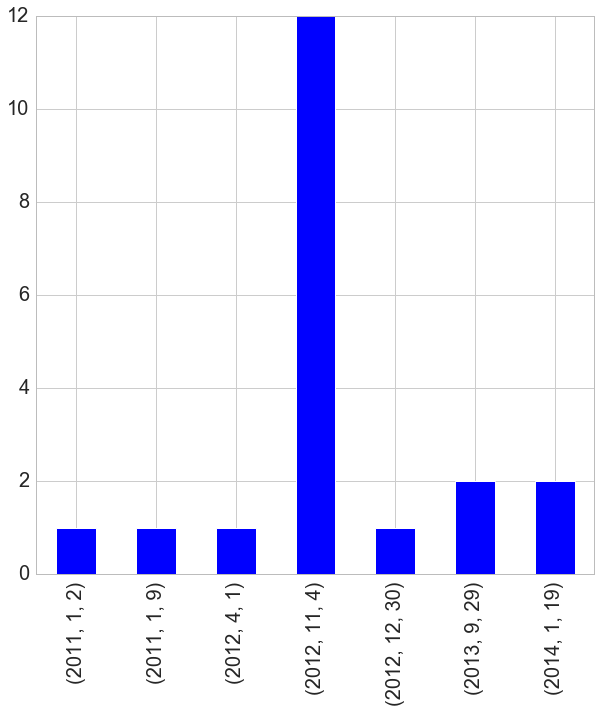

In [16]:
events.sort()
events.groupby([events.dt.year, events.dt.month, events.dt.day]).count().plot(kind="bar",fontsize=20, figsize=(10,10))
pl.xticks(rotation=90)

# My comment:

The sudden drop in MTA fare in November 4, 2012 should be caused by the Hurricane Sandy, which dated from October 22, 2012 to October 31, 2012.

## Task 2:
* Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

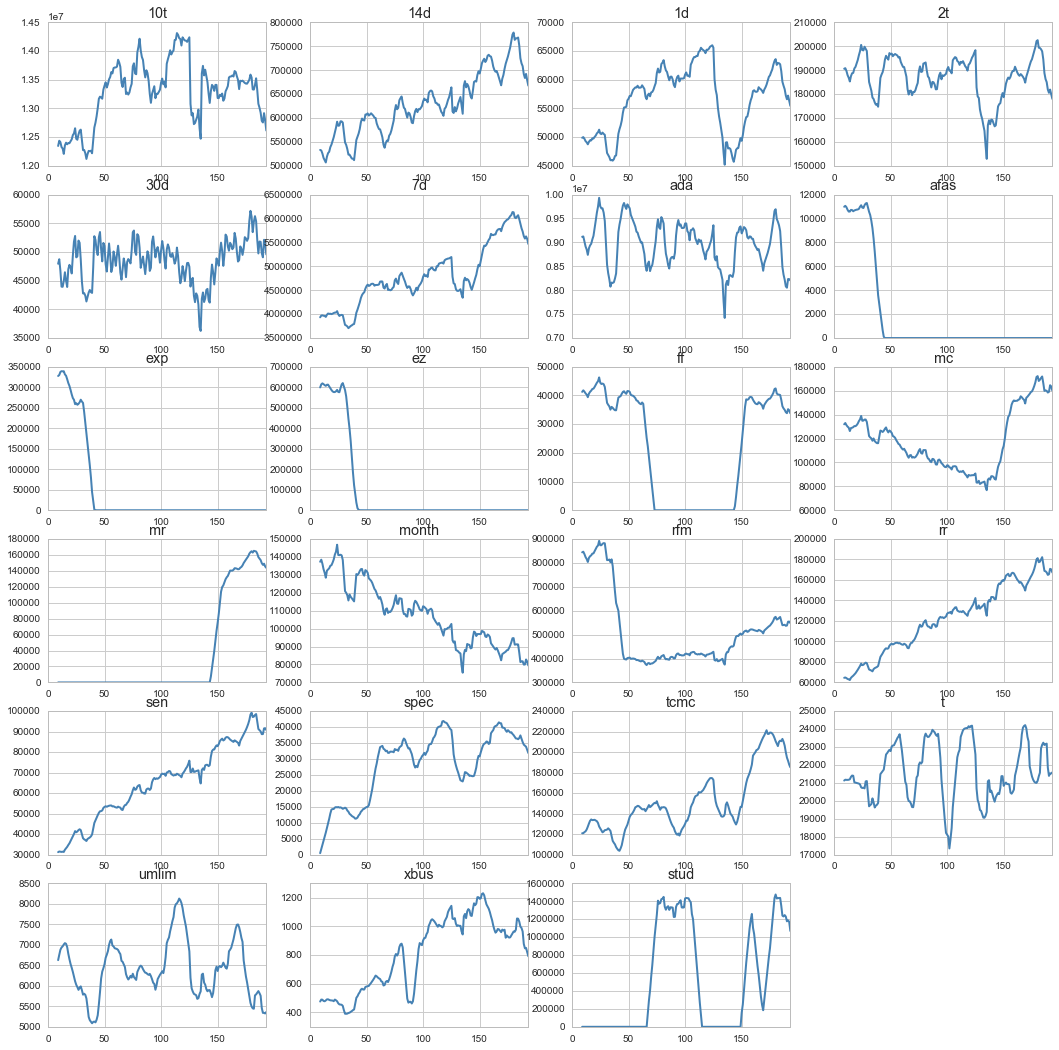

In [17]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(18,18))
mta_allsum = pd.DataFrame(mta_allsum)
ratio = np.zeros(23)
for i in range(23):
    ax = fig.add_subplot(6,4,i+1)
    roll_mean = pd.rolling_mean(mta_allsum.loc[i,:], 10)
    ax = roll_mean.plot()
    ratio[i] = roll_mean.loc[193]/roll_mean.loc[9]
    ax.set_title(ridetype[i])

In [18]:
from tabulate import tabulate
table = pd.DataFrame({'Type' : ridetype,
                     'Ratio' : ratio})
print tabulate(table, headers='keys', tablefmt="grid", floatfmt='.4f')

+---------+------------+--------+
|         |      Ratio | Type   |
+=========+============+========+
|  0.0000 |     1.0218 | 10t    |
+---------+------------+--------+
|  1.0000 |     1.2521 | 14d    |
+---------+------------+--------+
|  2.0000 |     1.1113 | 1d     |
+---------+------------+--------+
|  3.0000 |     0.9338 | 2t     |
+---------+------------+--------+
|  4.0000 |     1.0338 | 30d    |
+---------+------------+--------+
|  5.0000 |     1.3897 | 7d     |
+---------+------------+--------+
|  6.0000 |     0.8998 | ada    |
+---------+------------+--------+
|  7.0000 |     0.0002 | afas   |
+---------+------------+--------+
|  8.0000 |     0.0000 | exp    |
+---------+------------+--------+
|  9.0000 |     0.0000 | ez     |
+---------+------------+--------+
| 10.0000 |     0.8188 | ff     |
+---------+------------+--------+
| 11.0000 |     1.2135 | mc     |
+---------+------------+--------+
| 12.0000 | 24784.9310 | mr     |
+---------+------------+--------+
| 13.0000 |   

## My comment:

Through using moving mean, we can see steady increase in ride type "14d" "7d" "ff" "sen"

And steady decrease in ride type "month", while "afas", "exp", "ez" had a steady decrease and a jump to zero

## Task 3:

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


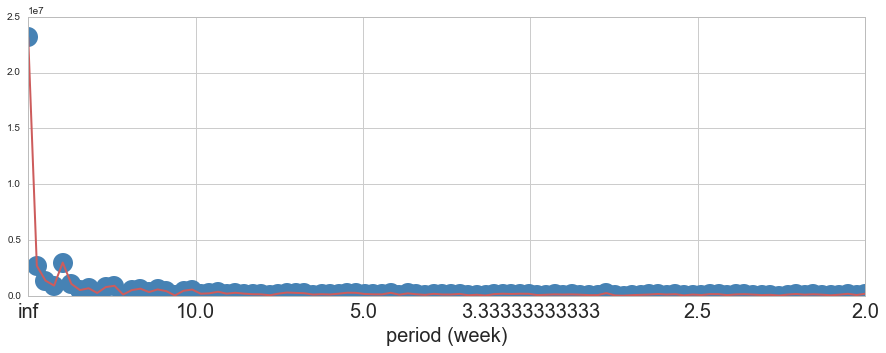

In [19]:
mta_allsum =pd.DataFrame(np.nansum(mta, axis=1))
f = np.abs(np.fft.rfft(mta_allsum.loc[0,:]))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sample_rate = 1
ax.plot(np.fft.rfftfreq(194, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(194, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)

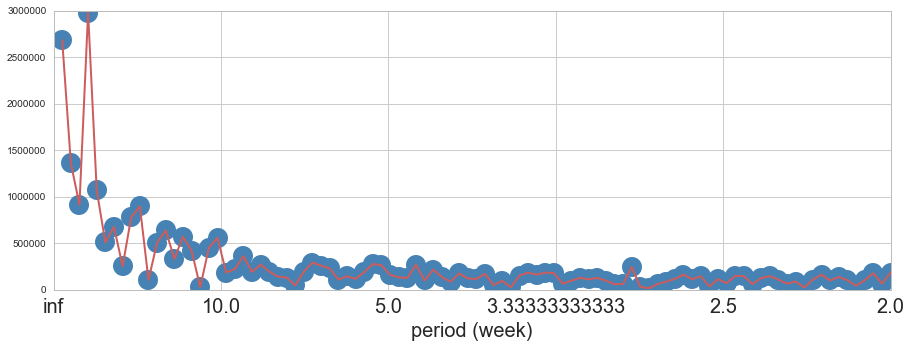

In [20]:
f = np.abs(np.fft.rfft(mta_allsum.loc[0,:]))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sample_rate = 1
ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=20)
ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)

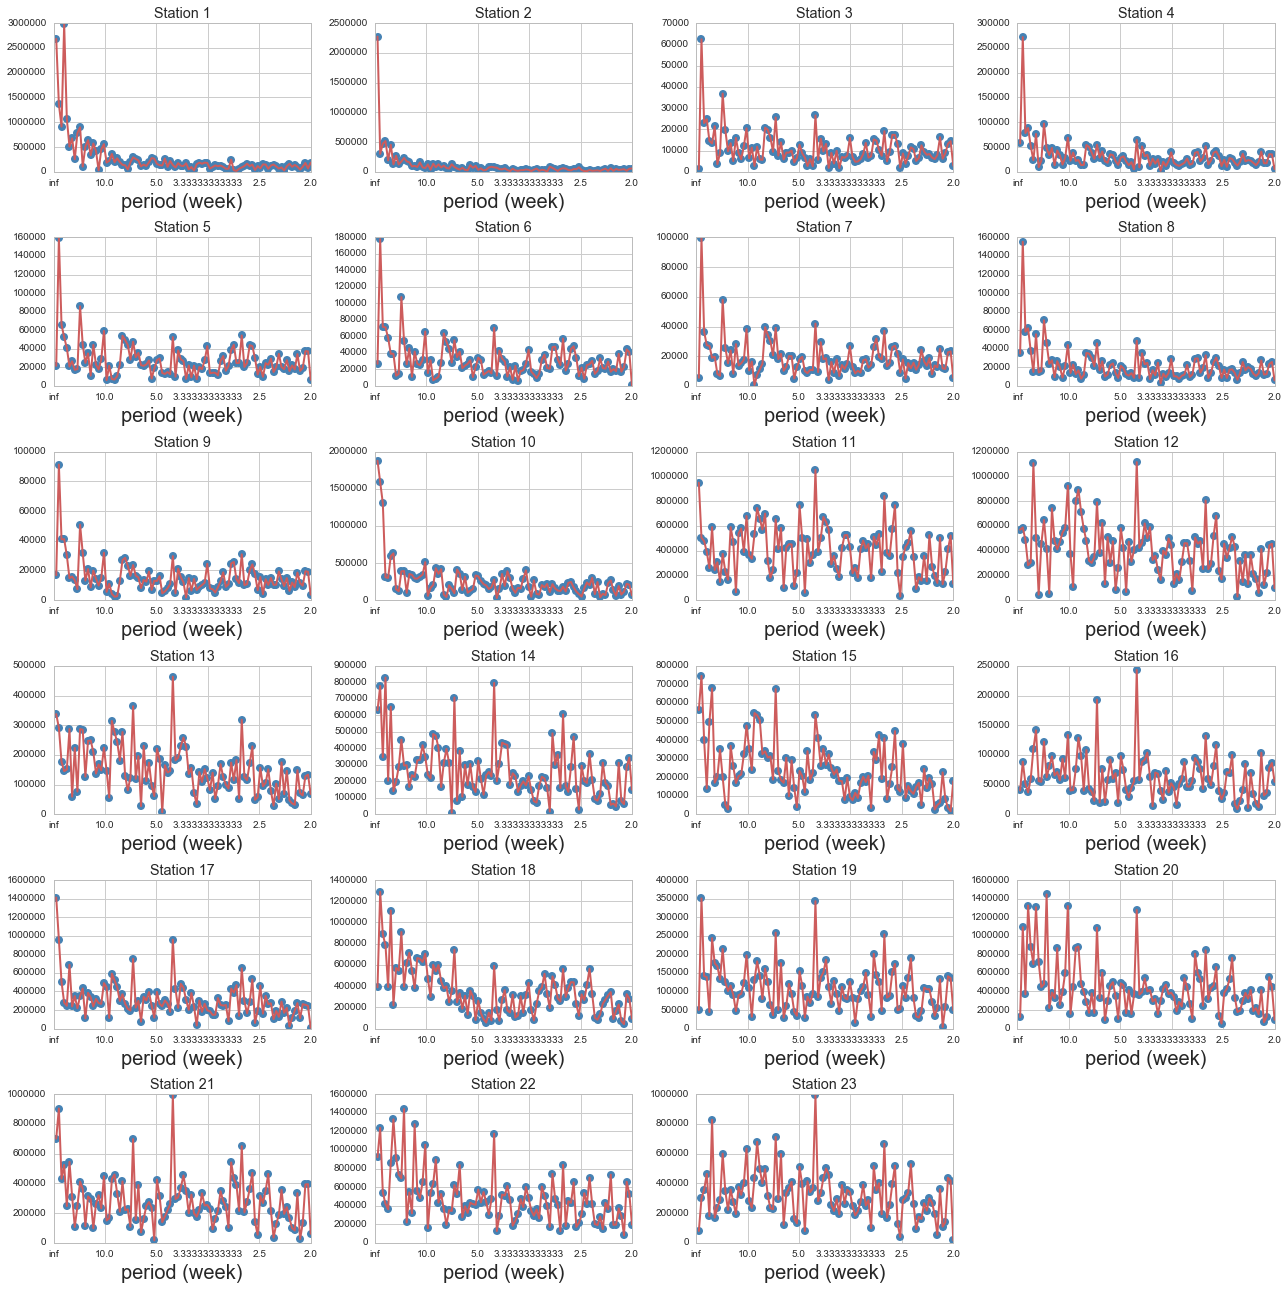

In [23]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(18,18))
for i in range(23):
    ax = fig.add_subplot(6,4,i+1)
    f = np.abs(np.fft.rfft(mta_allsum.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)
    pl.xlabel("period (week)", fontsize=20)
    ax.set_title("Station %d"%(i+1))
fig.tight_layout()

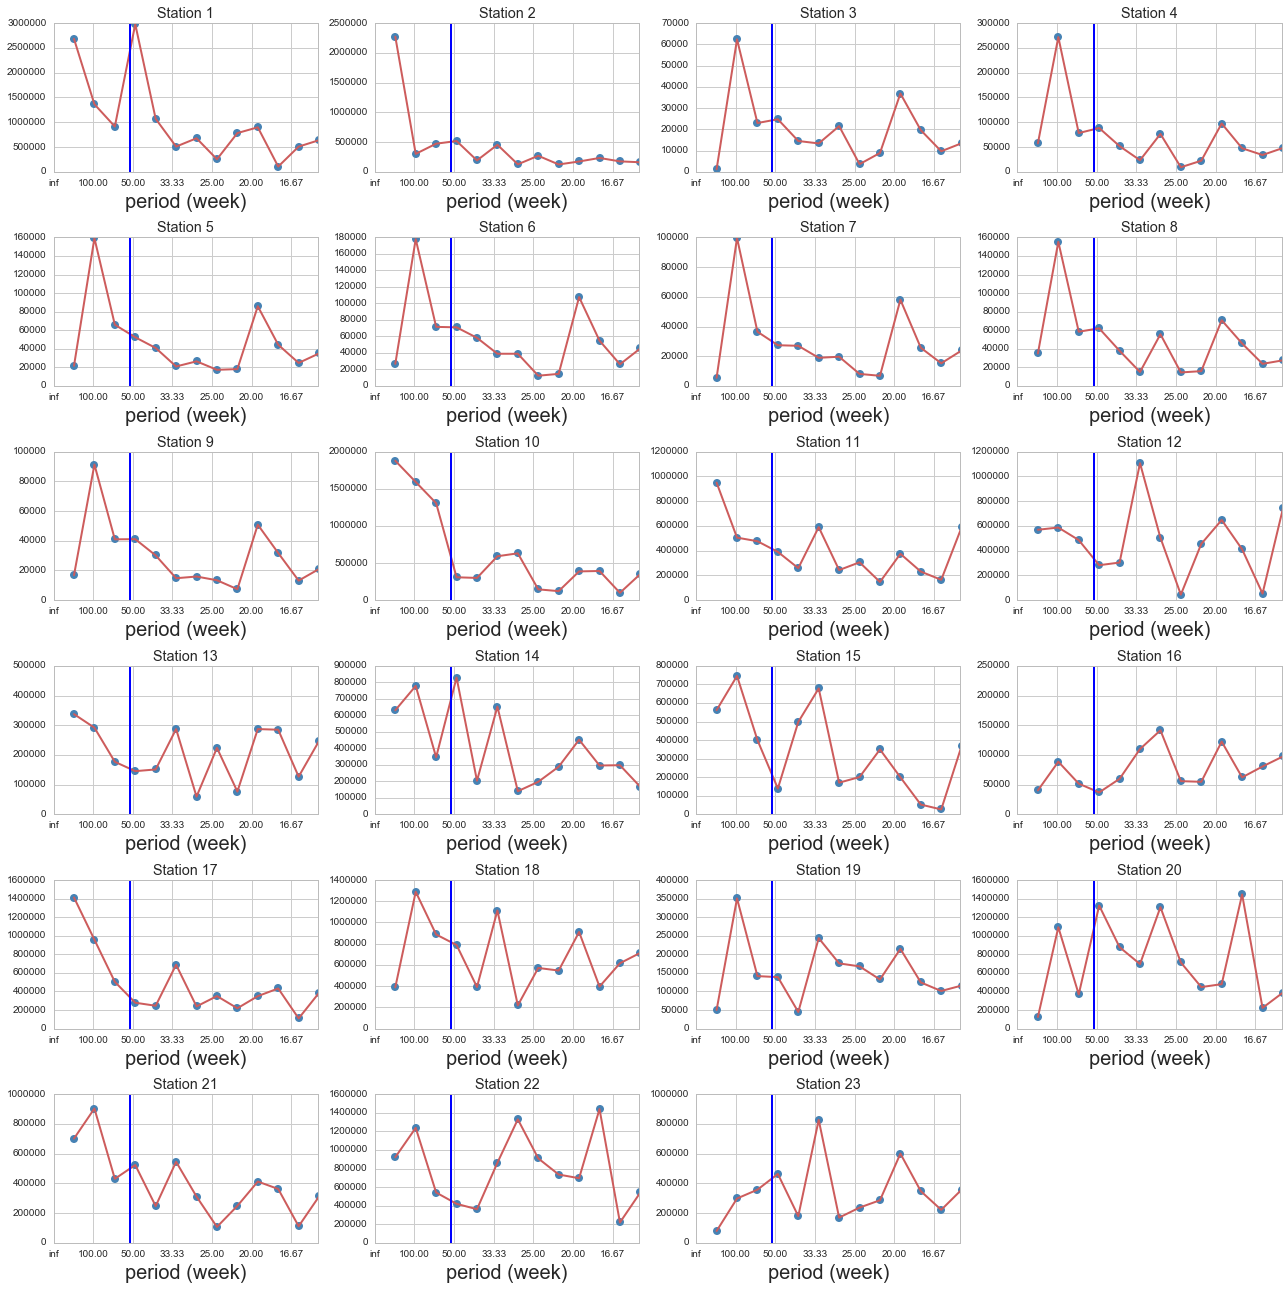

In [24]:
fig = plt.figure(figsize=(18,18))
annual = np.zeros(600)
for i in range(23):
    ax = fig.add_subplot(6,4,i+1)
    f = np.abs(np.fft.rfft(mta_allsum.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=10)
    pl.xlabel("period (week)", fontsize=20)
    plt.axvline(1.0/52)
    ax.set_title("Station %d"%(i+1))
fig.tight_layout()

In [25]:
annual = np.zeros(600)
for i in range(600):
    annual[i] = np.abs(np.fft.rfft(mta_allsum.loc[i,:])[4])

In [26]:
from operator import itemgetter
indices, L_sorted = zip(*sorted(enumerate(annual), key=itemgetter(1)))
print "The Station's with the most prominent annual periodicity are: %d, %d, %d, %d"%(indices[599], 
                                                                                     indices[598],
                                                                                     indices[597],
                                                                                     indices[596])

The Station's with the most prominent annual periodicity are: 0, 194, 150, 327


## EXTRA CREDIT: Cluster.

Cluster the time series, i.e. identify groups of time series that look similar among each other.

* My comment:

Doesn't sound like a good idea to use k-means on time series data. k-means is designed for low-dimensional spaces with a (meaningful) euclidean distance. It is not very robust towards outliers, as it puts squared weight on them.
DWT distance is the way to go for time series.

Resources:

http://nbviewer.ipython.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb

In [27]:
from sklearn import cluster, covariance, manifold

In [28]:
tots = mta.transpose(2,0,1).reshape(mta.shape[2], mta.shape[1]*mta.shape[0]).T
tots = tots[tots.std(1)>0]
data = tots.copy()
data /= data.std(axis=0)

In [29]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [30]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [31]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        print counter
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids

1
2
3
4
5
6
7
8
9
10


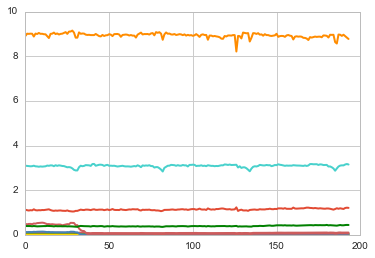

In [32]:
## It took plenty of time running it. Try if you want.
centroids=k_means_clust(data,10,10,4)
for i in centroids:
    plt.plot(i)
plt.show()